In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.preprocessing import LabelEncoder
from IPython.display import display

from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.model_selection import train_test_split
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import SilhouetteVisualizer

from sklearn.decomposition import PCA

In [3]:
data = pd.read_csv('full_data.csv')
X = data.drop(['Unnamed: 0', 'Winner'], axis=1)
y = data['Winner']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
X_train.shape

(4547, 96)

## Basic Clustering Algorithms

In [ ]:
km = KMeans(n_clusters=2, n_init=10).fit(X_train)

In [ ]:
print('\nIterations to Convergence:', km.n_iter_)
print('\nTotal Sum Squared Error:', km.inertia_)
print('\nAverage Silhouette Score:', silhouette_score(X_train, km.labels_))


Iterations to Convergence: 4

Total Sum Squared Error: 228413862.65477383

Average Silhouette Score: 0.19513321820469087


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


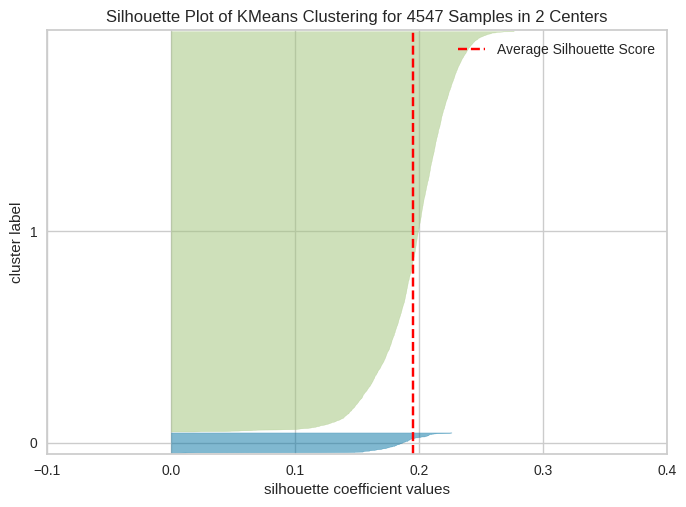

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 4547 Samples in 2 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [ ]:
# km = KMeans(n_clusters=2, n_init=10)
visualizer = SilhouetteVisualizer(km, colors='yellowbrick')

visualizer.fit(X_train)
visualizer.show()

In [ ]:
np.vstack((km.labels_, y_train))

array([[1, 0, 1, ..., 1, 1, 1],
       [1, 0, 0, ..., 0, 1, 0]])

In [ ]:
hac = AgglomerativeClustering(n_clusters=10).fit(X_train)
print('\nAverage Silhouette Score:', silhouette_score(X_train, hac.labels_))


Average Silhouette Score: 0.008949666424345014


In [ ]:
1 - (sum(abs(km.labels_ - y_train)) / len(y_train))

0.51638442929404

## PCA Analysis

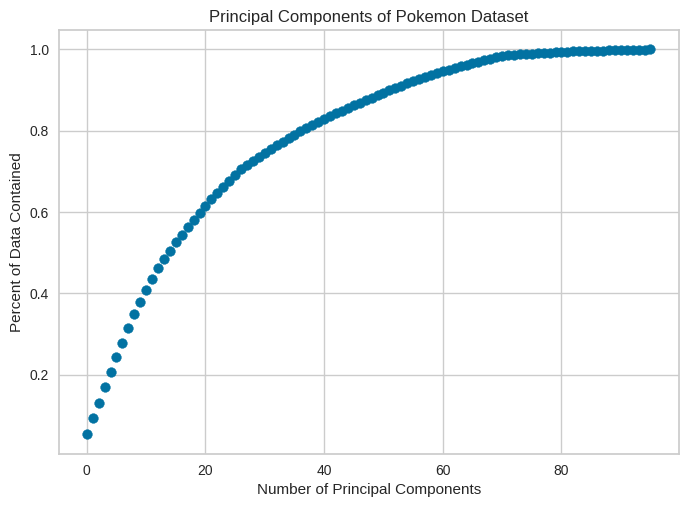

In [ ]:
pca = PCA()
pca.fit(X)
exp_var_cumul = np.cumsum(pca.explained_variance_ratio_)
plt.scatter(range(len(exp_var_cumul)), exp_var_cumul)
plt.title('Principal Components of Pokemon Dataset')
plt.ylabel('Percent of Data Contained')
plt.xlabel('Number of Principal Components')
plt.show()

In [ ]:
pca = PCA(n_components=25)
pc_data = pca.fit_transform(X)

pcX_train, pcX_test, _, _ = train_test_split(pc_data, y, test_size=0.2)

In [ ]:
pcX_train.shape, X_train.shape

((4547, 25), (4547, 96))


Iterations to Convergence: 6

Total Sum Squared Error: 151203021.9864505

Average Silhouette Score: 0.2524099747261578


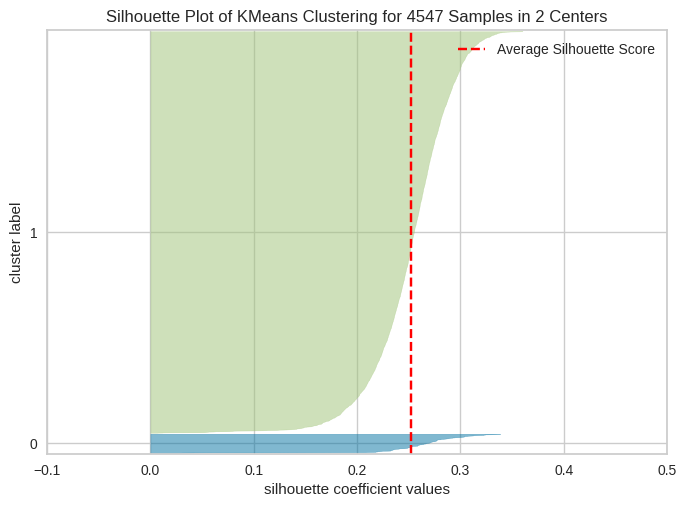

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 4547 Samples in 2 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [ ]:
km = KMeans(n_clusters=2, n_init=25).fit(pcX_train)
print('\nIterations to Convergence:', km.n_iter_)
print('\nTotal Sum Squared Error:', km.inertia_)
print('\nAverage Silhouette Score:', silhouette_score(pcX_train, km.labels_))
visualizer = SilhouetteVisualizer(km, colors='yellowbrick')
visualizer.fit(pcX_train)
visualizer.show()

In [ ]:
(sum(abs(km.labels_ - y_train)) / len(y_train))

0.5025291400923686

In [4]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV

In [8]:
# Whiten the data
X_copy = X.copy()

for col in X_copy.columns:
  X_copy[col] = (X[col] - X[col].mean()) / X[col].std()

Xc_train, Xc_test, yc_train, yc_test = train_test_split(X_copy, y, test_size=0.2)

In [16]:
clf = xgb.XGBClassifier(n_estimators=100, max_depth=100).fit(Xc_train, yc_train)

In [17]:
clf.score(Xc_train, yc_train), clf.score(Xc_test, yc_test)

(0.9923026171101825, 0.5206684256816183)

In [ ]:
clf = xgb.XGBClassifier(n_estimators=100, max_depth=96, learning_rate=0.3).fit(X_train, y_train)
clf.score(X_train, y_train), clf.score(X_test, y_test)

(0.9929623927864526, 0.5241864555848724)

In [ ]:
print(clf.learning_rate)

0.3


<Axes: >

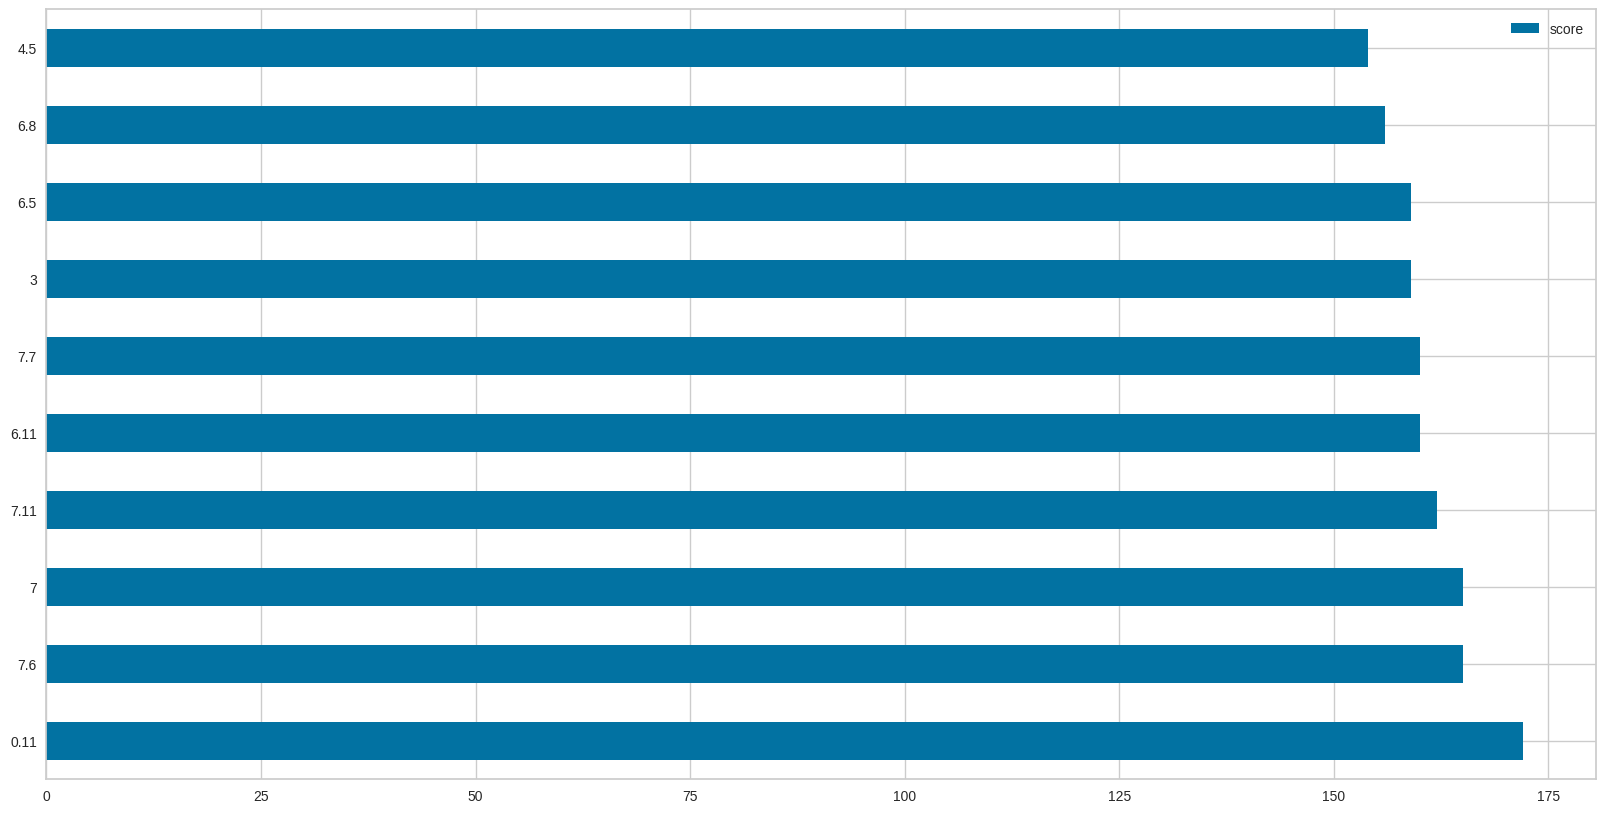

In [ ]:
feature_important = clf.get_booster().get_score(importance_type='weight')
keys = list(feature_important.keys())
values = list(feature_important.values())

data = pd.DataFrame(data=values, index=keys, columns=["score"]).sort_values(by = "score", ascending=False)
data.nlargest(10, columns="score").plot(kind='barh', figsize = (20,10)) ## plot top 40 features

In [ ]:
X.columns

Index(['0', '1', '2', '3', '4', '5', '6', '7', '0.1', '1.1', '2.1', '3.1',
       '4.1', '5.1', '6.1', '7.1', '0.2', '1.2', '2.2', '3.2', '4.2', '5.2',
       '6.2', '7.2', '0.3', '1.3', '2.3', '3.3', '4.3', '5.3', '6.3', '7.3',
       '0.4', '1.4', '2.4', '3.4', '4.4', '5.4', '6.4', '7.4', '0.5', '1.5',
       '2.5', '3.5', '4.5', '5.5', '6.5', '7.5', '0.6', '1.6', '2.6', '3.6',
       '4.6', '5.6', '6.6', '7.6', '0.7', '1.7', '2.7', '3.7', '4.7', '5.7',
       '6.7', '7.7', '0.8', '1.8', '2.8', '3.8', '4.8', '5.8', '6.8', '7.8',
       '0.9', '1.9', '2.9', '3.9', '4.9', '5.9', '6.9', '7.9', '0.10', '1.10',
       '2.10', '3.10', '4.10', '5.10', '6.10', '7.10', '0.11', '1.11', '2.11',
       '3.11', '4.11', '5.11', '6.11', '7.11'],
      dtype='object')

In [ ]:
xgb.plot_tree(clf)
fig = plt.gcf()
fig.set_size_inches(150,100)
plt.show()

Output hidden; open in https://colab.research.google.com to view.

In [18]:
from sklearn.linear_model import Perceptron
from sklearn.neural_network import MLPClassifier

In [13]:
model = MLPClassifier(activation = 'relu', solver = 'sgd', alpha = 0, batch_size = 1, learning_rate_init = .001,
                        shuffle = True, momentum = 0, n_iter_no_change = 50, max_iter = 2500, hidden_layer_sizes=[15])
clf = model.fit(Xc_train, yc_train)

In [15]:
clf.score(Xc_train, yc_train), clf.score(Xc_test, yc_test)

(0.8819001539476578, 0.47757255936675463)

In [19]:
clf = Perceptron(shuffle=False, verbose=0, eta0=.1, max_iter = 1000)
clf.fit(Xc_train, yc_train)

Perceptron(eta0=0.1, shuffle=False)

In [20]:
clf.score(Xc_train, yc_train), clf.score(Xc_test, yc_test)

(0.5122058500109963, 0.49604221635883905)